In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

#plt.style.use('fivethirtyeight')

#%run ./two-histograms.ipynb

In [2]:
df = pd.read_csv('../data/train_ph2_newfeatures.csv')

### Impute height and weight by gender's median

Text(0.5, 1.0, 'Height Distribution')

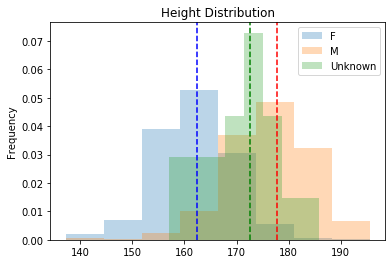

In [3]:
df.groupby("gender").height.plot.hist(bins=8, alpha=0.3, density=True)
plt.axvline(df[df["gender"]=='M'].height.median(), color = 'r',linestyle='dashed')
plt.axvline(df[df["gender"]=='F'].height.median(), color = 'b',linestyle='dashed')
plt.axvline(df[df["gender"]=='Unknown'].height.median(), color = 'g',linestyle='dashed')
plt.legend()
plt.title("Height Distribution")

Text(0.5, 1.0, 'Weight Distribution')

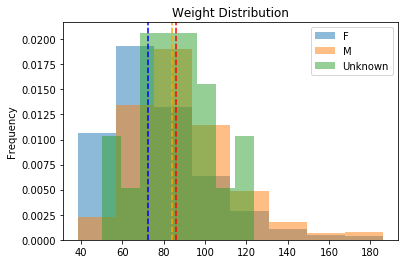

In [4]:
df.groupby("gender").weight.plot.hist(bins=8, alpha=0.5, density=True)
plt.axvline(df[df["gender"]=='M'].weight.median(), color = 'r',linestyle='dashed')
plt.axvline(df[df["gender"]=='F'].weight.median(), color = 'b',linestyle='dashed')
plt.axvline(df[df["gender"]=='Unknown'].weight.median(), color = 'orange',linestyle='dashed')
plt.legend()
plt.title("Weight Distribution")

In [5]:
male = df[df.gender == 'M']
male_height_null_index = male[male.height.isnull()].index
male_weight_null_index = male[male.weight.isnull()].index

In [6]:
w_median = {}
w_median['F'] = df[df["gender"]=='F'].weight.median()
w_median['M'] = df[df["gender"]=='M'].weight.median()
w_median['Unknown'] = df[df["gender"]=='Unknown'].weight.median()

h_median = {}
h_median['F'] = df[df["gender"]=='F'].height.median()
h_median['M'] = df[df["gender"]=='M'].height.median()
h_median['Unknown'] = df[df["gender"]=='Unknown'].height.median()
print(w_median, h_median)

{'F': 72.6, 'M': 86.0, 'Unknown': 83.9} {'F': 162.5, 'M': 177.8, 'Unknown': 172.5}


In [7]:
for sex in df.gender.unique():
    print(sex)
    gender = df[df.gender == sex]
    height_null_index = gender[gender.height.isnull()].index
    weight_null_index = gender[gender.weight.isnull()].index
    print(df.loc[height_null_index].height.head())
    print(df.loc[weight_null_index].weight.head())
    df.loc[height_null_index,'height'] = df.loc[height_null_index,'height'].fillna(h_median[sex])
    df.loc[weight_null_index,'weight'] = df.loc[weight_null_index,'weight'].fillna(w_median[sex])
    print(df.loc[height_null_index].height.head())
    print(df.loc[weight_null_index].weight.head(10))

M
289   NaN
539   NaN
657   NaN
793   NaN
824   NaN
Name: height, dtype: float64
4    NaN
7    NaN
8    NaN
12   NaN
13   NaN
Name: weight, dtype: float64
289    177.8
539    177.8
657    177.8
793    177.8
824    177.8
Name: height, dtype: float64
4      86.0
7      86.0
8      86.0
12     86.0
13     86.0
50     86.0
54     86.0
71     86.0
75     86.0
101    86.0
Name: weight, dtype: float64
F
86    NaN
542   NaN
625   NaN
770   NaN
871   NaN
Name: height, dtype: float64
15   NaN
22   NaN
28   NaN
37   NaN
41   NaN
Name: weight, dtype: float64
86     162.5
542    162.5
625    162.5
770    162.5
871    162.5
Name: height, dtype: float64
15    72.6
22    72.6
28    72.6
37    72.6
41    72.6
51    72.6
58    72.6
69    72.6
72    72.6
77    72.6
Name: weight, dtype: float64
Unknown
1177    NaN
12417   NaN
43103   NaN
43725   NaN
44643   NaN
Name: height, dtype: float64
12417   NaN
44643   NaN
51781   NaN
64629   NaN
Name: weight, dtype: float64
1177     172.5
12417    172.5
43103    1

### Calculate bmi for missing rows

In [8]:
bmi_null_index = df[df.bmi.isnull()].index
df.loc[bmi_null_index].head()

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_ttl_tests,d1_ttl_tests,h1_num_labs,d1_num_labs,h1_lbg,d1_lbg,total_tests_increase,total_labs_increase,added_lbg,chronic_diagnosis
4,33,0,19.0,NaN,0,Caucasian,M,188.0,Emergency Department,Accident & Emergency,...,16,20,0,0,0,0,4,0,0,0.0
7,33,0,70.0,NaN,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,...,20,48,0,22,0,1,28,22,1,1.0
8,118,1,45.0,NaN,0,Caucasian,M,170.2,Other Hospital,Other Hospital,...,64,64,30,30,1,1,0,0,0,0.0
12,118,0,48.0,NaN,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,...,20,30,0,10,0,0,10,10,0,0.0
13,118,0,65.0,NaN,1,Caucasian,M,172.7,Operating Room,Operating Room / Recovery,...,22,46,2,26,0,0,24,24,0,0.0


In [9]:
# kilograms/metres^2, weight/(height/100)**2
df.loc[bmi_null_index, 'bmi'] = df.loc[bmi_null_index, 'bmi'].fillna(round(df.weight/(df.height/100)**2,2))

In [10]:
df.loc[bmi_null_index].head()

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_ttl_tests,d1_ttl_tests,h1_num_labs,d1_num_labs,h1_lbg,d1_lbg,total_tests_increase,total_labs_increase,added_lbg,chronic_diagnosis
4,33,0,19.0,24.33,0,Caucasian,M,188.0,Emergency Department,Accident & Emergency,...,16,20,0,0,0,0,4,0,0,0.0
7,33,0,70.0,31.59,0,Caucasian,M,165.0,Emergency Department,Accident & Emergency,...,20,48,0,22,0,1,28,22,1,1.0
8,118,1,45.0,29.69,0,Caucasian,M,170.2,Other Hospital,Other Hospital,...,64,64,30,30,1,1,0,0,0,0.0
12,118,0,48.0,27.99,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,...,20,30,0,10,0,0,10,10,0,0.0
13,118,0,65.0,28.83,1,Caucasian,M,172.7,Operating Room,Operating Room / Recovery,...,22,46,2,26,0,0,24,24,0,0.0


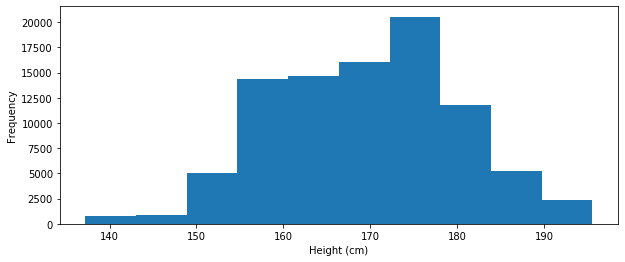

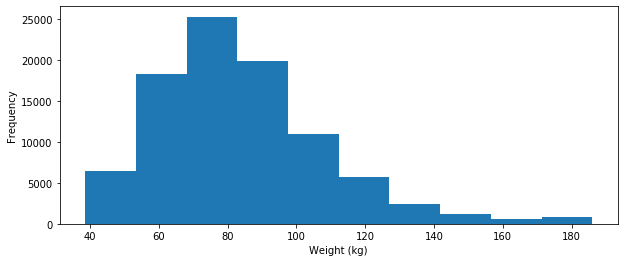

Text(0.5, 0, 'bmi')

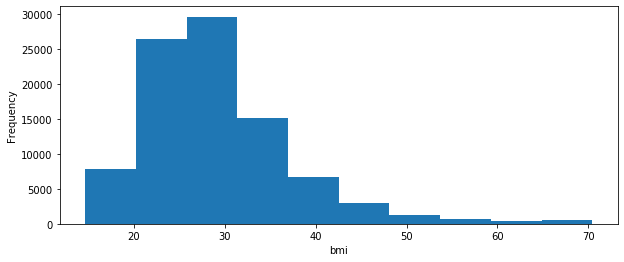

In [11]:
df.height.plot.hist(figsize=(10,4))
plt.xlabel('Height (cm)')
plt.show()
df.weight.plot.hist(figsize=(10,4))
plt.xlabel('Weight (kg)')
plt.show()
df.bmi.plot.hist(figsize=(10,4))
plt.xlabel('bmi')

#### Impute Age with fillna(0)

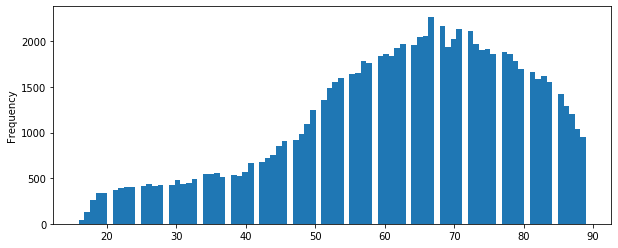

In [13]:
df.age.plot.hist(figsize=(10,4),bins=90)

In [14]:
age_null_index = df[df.age.isnull()].index
df.loc[age_null_index].head()

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_ttl_tests,d1_ttl_tests,h1_num_labs,d1_num_labs,h1_lbg,d1_lbg,total_tests_increase,total_labs_increase,added_lbg,chronic_diagnosis
28,118,0,NaN,28.360000,1,Caucasian,F,160.0,Operating Room,Operating Room / Recovery,...,26,60,0,26,0,1,34,26,1,1.0
72,118,0,NaN,25.850000,0,Caucasian,F,167.6,Emergency Department,Accident & Emergency,...,22,44,2,24,0,0,22,22,0,0.0
145,31,0,NaN,24.547736,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,...,16,46,0,26,0,0,30,26,0,0.0
174,33,0,NaN,28.359375,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,...,22,48,2,28,0,0,26,26,0,1.0
183,69,0,NaN,26.630000,0,Caucasian,F,165.1,Emergency Department,Accident & Emergency,...,20,46,0,26,0,0,26,26,0,0.0


In [15]:
df.loc[age_null_index,'age'] = df.loc[age_null_index,'age'].fillna(0)
#df.loc[age_null_index,'age'] = df.loc[age_null_index,'age'].fillna(df.age.median())
df.loc[age_null_index].head()

,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_ttl_tests,d1_ttl_tests,h1_num_labs,d1_num_labs,h1_lbg,d1_lbg,total_tests_increase,total_labs_increase,added_lbg,chronic_diagnosis
28,118,0,0.0,28.360000,1,Caucasian,F,160.0,Operating Room,Operating Room / Recovery,...,26,60,0,26,0,1,34,26,1,1.0
72,118,0,0.0,25.850000,0,Caucasian,F,167.6,Emergency Department,Accident & Emergency,...,22,44,2,24,0,0,22,22,0,0.0
145,31,0,0.0,24.547736,0,Caucasian,M,180.3,Emergency Department,Accident & Emergency,...,16,46,0,26,0,0,30,26,0,0.0
174,33,0,0.0,28.359375,0,Caucasian,F,160.0,Emergency Department,Accident & Emergency,...,22,48,2,28,0,0,26,26,0,1.0
183,69,0,0.0,26.630000,0,Caucasian,F,165.1,Emergency Department,Accident & Emergency,...,20,46,0,26,0,0,26,26,0,0.0


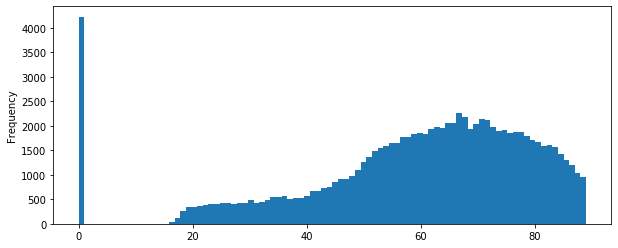

In [16]:
df.age.plot.hist(figsize=(10,4), bins=90)

In [19]:
demographic = ['hospital_death','age','bmi','weight','height','elective_surgery','ethnicity','gender','hospital_id','hospital_admit_source',
'icu_admit_source','icu_id','icu_stay_type','icu_type','pre_icu_los_days']

df[demographic].isnull().sum()

hospital_death           0
age                      0
bmi                      0
weight                   0
height                   0
elective_surgery         0
ethnicity                0
gender                   0
hospital_id              0
hospital_admit_source    0
icu_admit_source         0
icu_id                   0
icu_stay_type            0
icu_type                 0
pre_icu_los_days         0
dtype: int64

### Save the dataframe

In [17]:
df.shape

(91713, 196)

In [18]:
df.to_csv('../data/train_ph2_nf_imputed.csv', index=False)